In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

In [2]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
n_class = 10

X_train = np.reshape(X_train, (-1, 28 * 28)) / 255.
X_test = np.reshape(X_test, (-1, 28 * 28)) /255.

Y_train = np.eye(n_class)[Y_train]
Y_test = np.eye(n_class)[Y_test]

print("X_train.shape :", X_train.shape)
print("Y_train.shape :", Y_train.shape)
print()
print("X_test.shape :", X_test.shape)
print("Y_test.shape :", Y_test.shape)

X_train.shape : (60000, 784)
Y_train.shape : (60000, 10)

X_test.shape : (10000, 784)
Y_test.shape : (10000, 10)


In [0]:
learning_rate = 0.01
epochs = 201

X = tf.placeholder(tf.float32, [None, 784], name="X")
Y = tf.placeholder(tf.int32, [None, 10], name="Y")

with tf.variable_scope("FC1", reuse=tf.AUTO_REUSE):
  W = tf.get_variable(name="W", shape=[784, 10], initializer=tf.contrib.layers.xavier_initializer(seed=20181007))
  b = tf.get_variable(name="b", shape=[10], initializer=tf.contrib.layers.xavier_initializer(seed=20181007))

  Z = tf.matmul(X, W) + b
  A = tf.nn.softmax(Z)

  cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=A, labels=Y))
  acc = tf.reduce_mean(tf.cast(tf.equal(tf.argmax(Y, axis=1),tf.argmax(A, axis=1)), tf.float32))
  optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)

In [4]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())
sess.run(tf.local_variables_initializer())
for epoch in range(epochs):
  _, _cost, _acc = sess.run([optimizer, cost, acc], feed_dict={X: X_train, Y: Y_train})
  if epoch % 10 == 0 :
    print("Epoch:", epoch,"\t", "Cost:",_cost,"\t", "Acc:",_acc * 100)
print("Train Acc:",_acc*100)
_acc = sess.run(acc, feed_dict={X: X_test, Y: Y_test})
print("Test Acc:", _acc * 100 )

Epoch: 0 	 Cost: 2.3047657 	 Acc: 11.201666295528412
Epoch: 10 	 Cost: 1.7742414 	 Acc: 79.29166555404663
Epoch: 20 	 Cost: 1.6563239 	 Acc: 85.32000184059143
Epoch: 30 	 Cost: 1.6196469 	 Acc: 87.58999705314636
Epoch: 40 	 Cost: 1.6014175 	 Acc: 88.79666924476624
Epoch: 50 	 Cost: 1.5904578 	 Acc: 89.56000208854675
Epoch: 60 	 Cost: 1.5829066 	 Acc: 90.17166495323181
Epoch: 70 	 Cost: 1.5772018 	 Acc: 90.59000015258789
Epoch: 80 	 Cost: 1.5726383 	 Acc: 90.95333218574524
Epoch: 90 	 Cost: 1.5688729 	 Acc: 91.25166535377502
Epoch: 100 	 Cost: 1.565706 	 Acc: 91.4900004863739
Epoch: 110 	 Cost: 1.5629915 	 Acc: 91.68499708175659
Epoch: 120 	 Cost: 1.5606244 	 Acc: 91.86833500862122
Epoch: 130 	 Cost: 1.5585287 	 Acc: 92.0199990272522
Epoch: 140 	 Cost: 1.5566481 	 Acc: 92.13500022888184
Epoch: 150 	 Cost: 1.5549469 	 Acc: 92.24333167076111
Epoch: 160 	 Cost: 1.5533954 	 Acc: 92.3550009727478
Epoch: 170 	 Cost: 1.5519694 	 Acc: 92.47000217437744
Epoch: 180 	 Cost: 1.5506513 	 Acc: 92.546

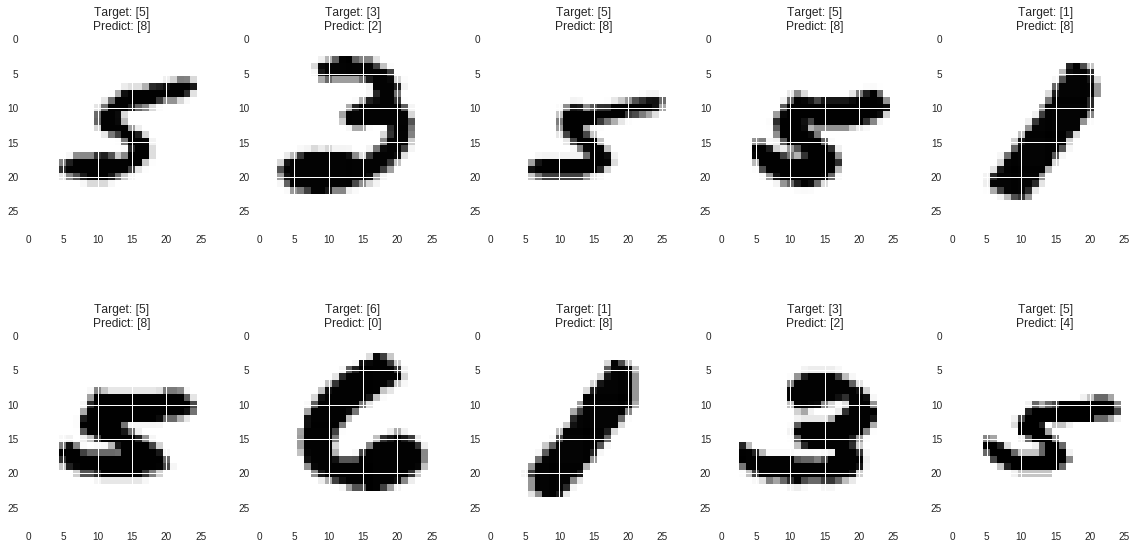

In [5]:
%matplotlib inline
Y_hat, Y_ = sess.run([tf.argmax(A, axis=1), tf.argmax(Y_test, axis=1)], feed_dict={X: X_test, Y:Y_test})
fig=plt.figure(figsize=(20, 10))

not_equal= Y_hat!=Y_
imgs = X_test[not_equal] 
r = np.random.randint(len(imgs)-10, size=1)
for i in range(10):
  img = imgs[i+r].reshape(28, 28)
  fig.add_subplot(2, 5, i+1)
  plt.imshow(img)
  plt.title("Target: "+str(Y_[not_equal][i+r])+"\nPredict: "+ str(Y_hat[not_equal][i+r]) )
